Hola **Ricardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst se debe cuidar la presentación de tus proyectos, por esto te recomiendo siempre al inicio del notebook en una celda markdown deja un título general para el proyecto y una breve introducción del mismo
</div>

# Predicción de Cancelación de Clientes en Model Fitness

## Introducción

Model Fitness es una cadena de gimnasios que busca reducir la pérdida de clientes a través del analisis de datos. En este proyecto se estudian los perfiles de usuarios, su comportamiento y factores que influyen en la cancelacion de suscripciones.

Los objetivos del analisis son:

- Predecir la probabilidad de que un cliente cancele su suscripcion.
- Identificar patrones de comportamiento comunes en distintos tipos de clientes.
- Detectar grupos de usuarios con mayor riesgo de cancelación.
- Proponer estrategias de retención y marketing basadas en datos.

Este analisis utiliza tecnicas de aprendizaje automatico (clasificacion y clustering), visualizaciones y metricas para respaldar las recomendaciones de negocio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así dejas mucho más claro de que se tratará el proyecto
</div>

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
cancelaciones = pd.read_csv('/datasets/gym_churn_us.csv')

cancelaciones.shape
cancelaciones.info()
cancelaciones.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [3]:
medias_por_grupo = cancelaciones.groupby('Churn').mean().T

medias_por_grupo.columns = ['Se quedaron', 'Cancelaron']

medias_por_grupo['Diferencia'] = medias_por_grupo['Cancelaron'] - medias_por_grupo['Se quedaron']

medias_ordenadas = medias_por_grupo.reindex(medias_por_grupo['Diferencia'].abs().sort_values(ascending=False).index)

display(medias_ordenadas.round(2))

,Se quedaron,Cancelaron,Diferencia
Avg_additional_charges_total,158.45,115.08,-43.36
Contract_period,5.75,1.73,-4.02
Lifetime,4.71,0.99,-3.72
Month_to_end_contract,5.28,1.66,-3.62
Age,29.98,26.99,-2.99
Avg_class_frequency_current_month,2.03,1.04,-0.98
Avg_class_frequency_total,2.02,1.47,-0.55
Group_visits,0.46,0.27,-0.20
Partner,0.53,0.36,-0.18
Promo_friends,0.35,0.18,-0.17


### Interpretación de los valores medios por grupo
### Variables más influyentes (mayor diferencia):


- Avg_additional_charges_total (-43.36):

Los usuarios que se quedan gastan más en servicios extra (café, masajes, productos). Es un fuerte indicador de compromiso.

- Contract_period (-4.02):

Los que se quedan tienen contratos más largos. Usuarios con contratos de 1 año o 6 meses cancelan menos.

- Lifetime (-3.72):

Los que se quedan han estado en el gimnasio por más tiempo. La antigüedad es clave.

- Month_to_end_contract (-3.62):	

Los que cancelan tienen menos tiempo restante en su contrato. Puede indicar que se dan de baja al terminar.

- Age	(-2.99):	

Los que cancelan son más jóvenes. Puede que no hayan desarrollado un hábito o estabilidad.


### Variables de comportamiento:


- Avg_class_frequency_current_month (-0.98):

Los que se quedan asisten más al gimnasio en el último mes.

- Avg_class_frequency_total (-0.55):

Y tambien históricamente. El compromiso se refleja en la asistencia.

- Group_visits (-0.20):

Participar en clases grupales parece retener más. Refleja conexion social.

- Partner	(-0.18):

Ser parte de una empresa asociada aumenta la permanencia.

- Promo_friends (-0.17):	

Inscribirse por recomendación de amigos también se relaciona con mayor retencion.

- Near_Location (-0.10):	

Vivir cerca ayuda un poco, aunque menos que otras variables.

### Conclusion rapida

Los usuarios que cancelan:

- Tienen contratos cortos.

- Son más jóvenes.

- Vienen menos al gimnasio, especialmente el último mes.

- No participan tanto en clases grupales.

- Gastan menos en servicios extra.

- Se unieron sin amigos, sin empresa asociada, y viven más lejos.

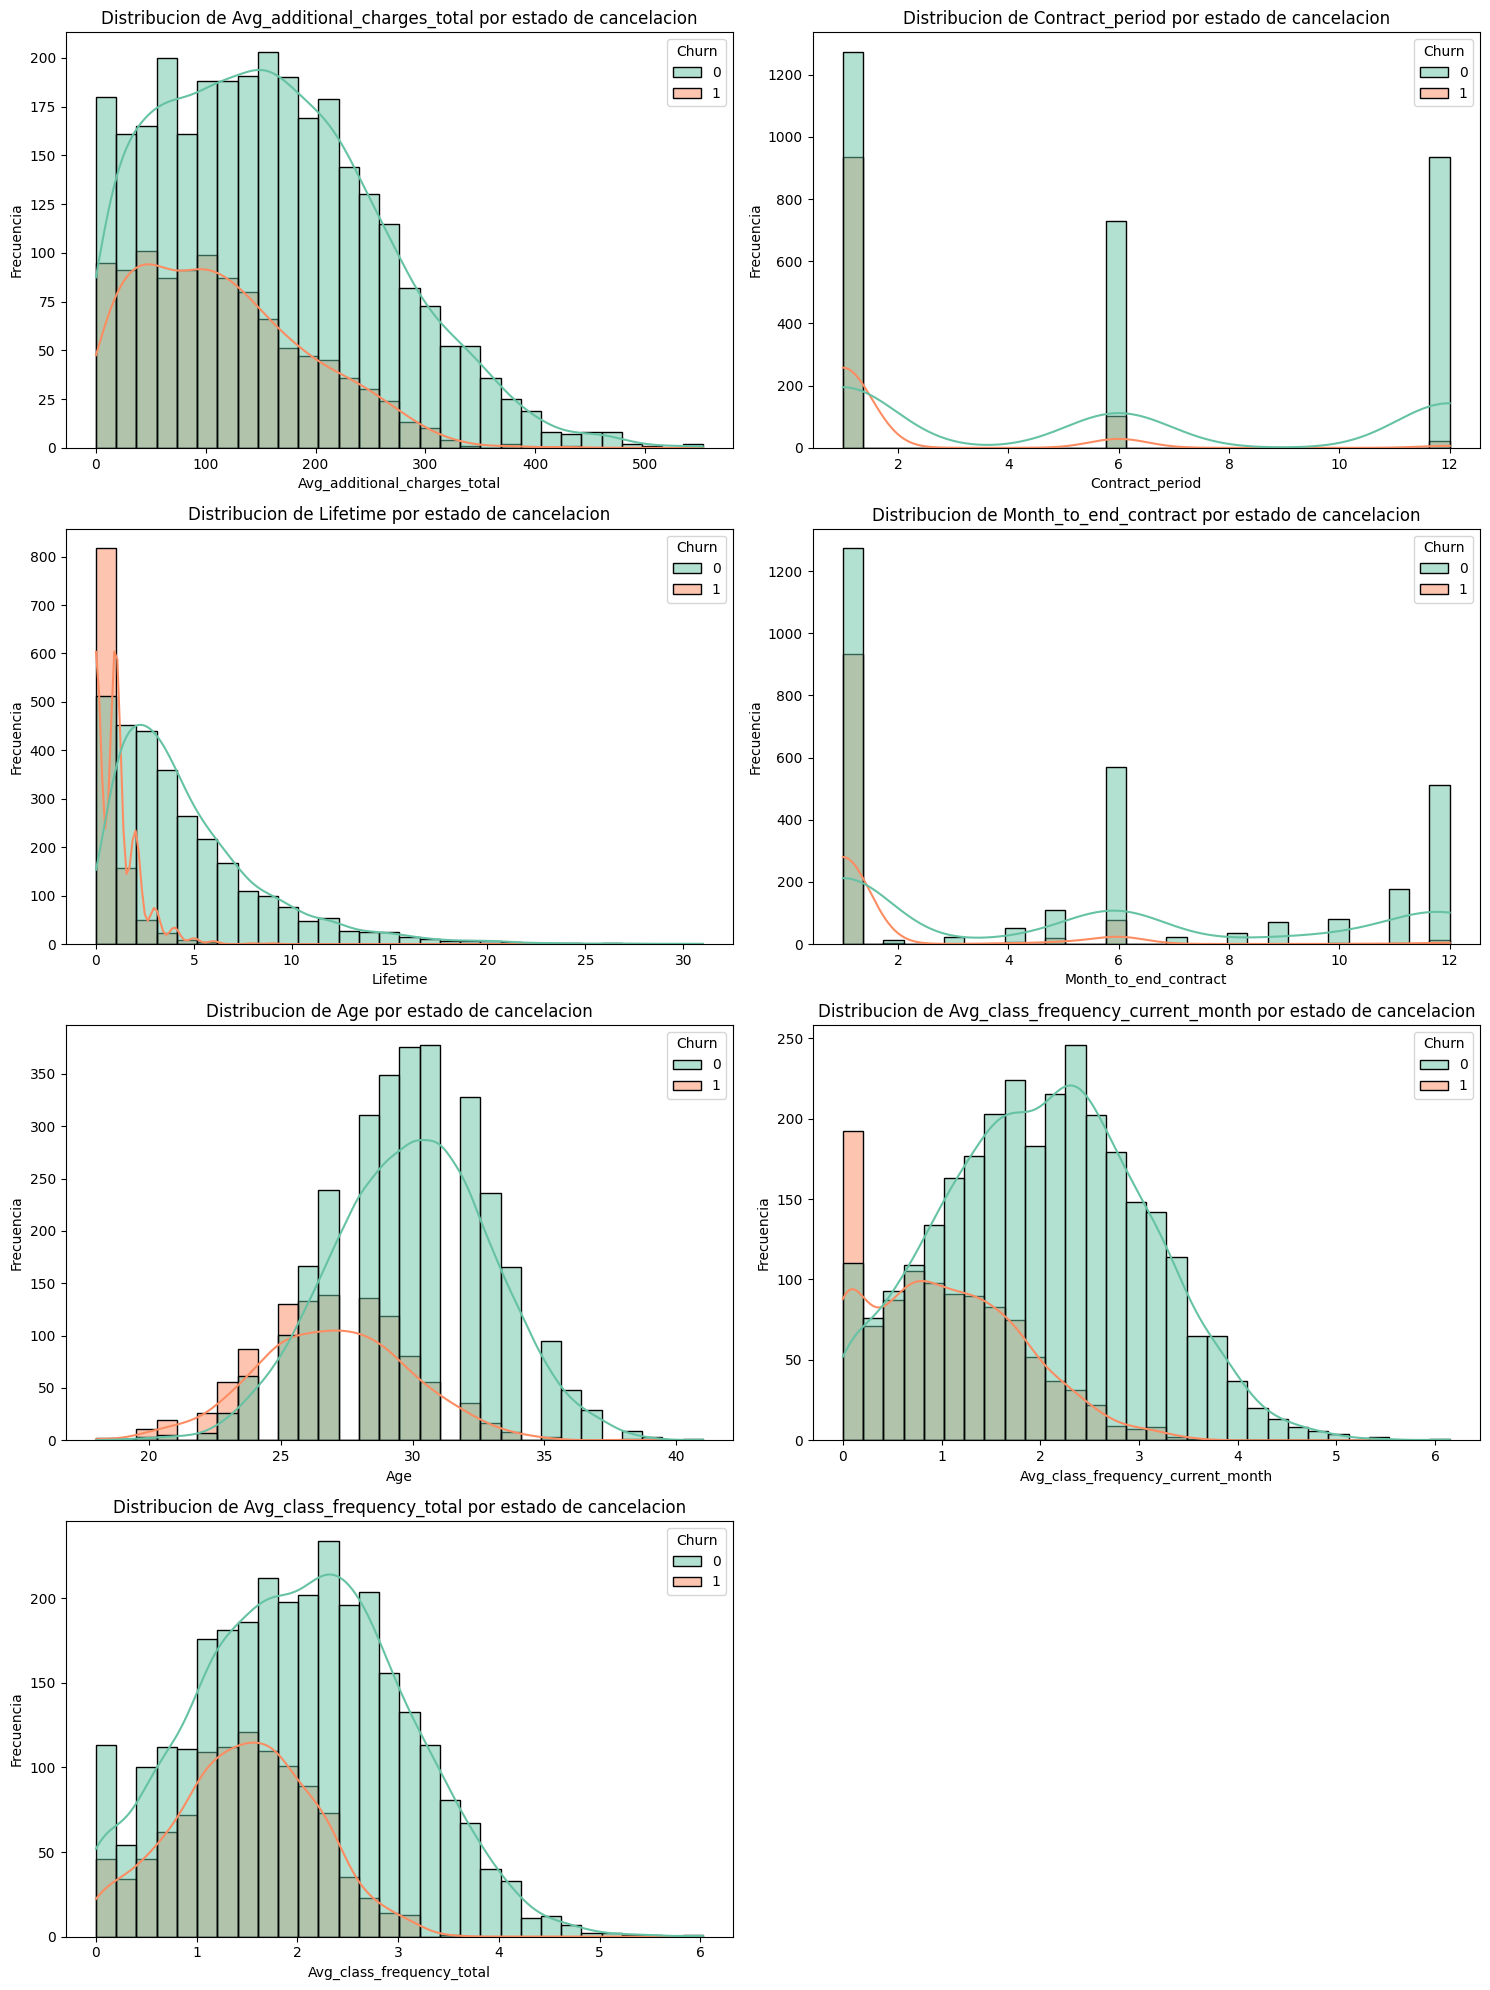

In [4]:
variables_importantes = [
    'Avg_additional_charges_total',
    'Contract_period',
    'Lifetime',
    'Month_to_end_contract',
    'Age',
    'Avg_class_frequency_current_month',
    'Avg_class_frequency_total'
]

plt.figure(figsize=(15, 20))

for i, var in enumerate(variables_importantes):
    plt.subplot(4,2, i+1)
    sns.histplot(data=cancelaciones, x=var, hue='Churn', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribucion de {var} por estado de cancelacion')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Esto es lo que podemos interpretar de los graficos anteriores:

1. - Avg_additional_charges_total
Los usuarios que gastan mas en servicios adicionales tienen una menor tasa de cancelación.
Los que cancelan están concentrados por debajo de los $100.

Conclusion: gastos extra indican mayor compromiso.

2. - Contract_period y Month_to_end_contract
Los contratos de 12 meses y 6 meses retienen mejor a los clientes.
Aquellos con contratos de 1 mes o con pocos meses restantes son los que más cancelan.

Conclusion: los contratos largos son una barrera contra la rotacion.

3. - Lifetime
El pico de cancelaciones esta en los primeros 1–2 meses.
Los usuarios que han estado mas tiempo (a partir de 5 meses) rara vez cancelan.

Conclusion: los clientes nuevos están en mayor riesgo.

4. - Avg_class_frequency_current_month y total
La frecuencia semanal de asistencia es claramente mayor en usuarios que se quedan.
Los que cancelan casi no asistieron en el mes actual.

Conclusion: la asistencia reciente es uno de los predictores más fuertes.

5. - Age
Usuarios mas jóvenes (18–26) cancelan más.
Los mayores de 30 tienden a quedarse.

Conclusion: los jóvenes pueden requerir estrategias de retención mas específicas (motivacion, rutinas mas atractivas, etc.).

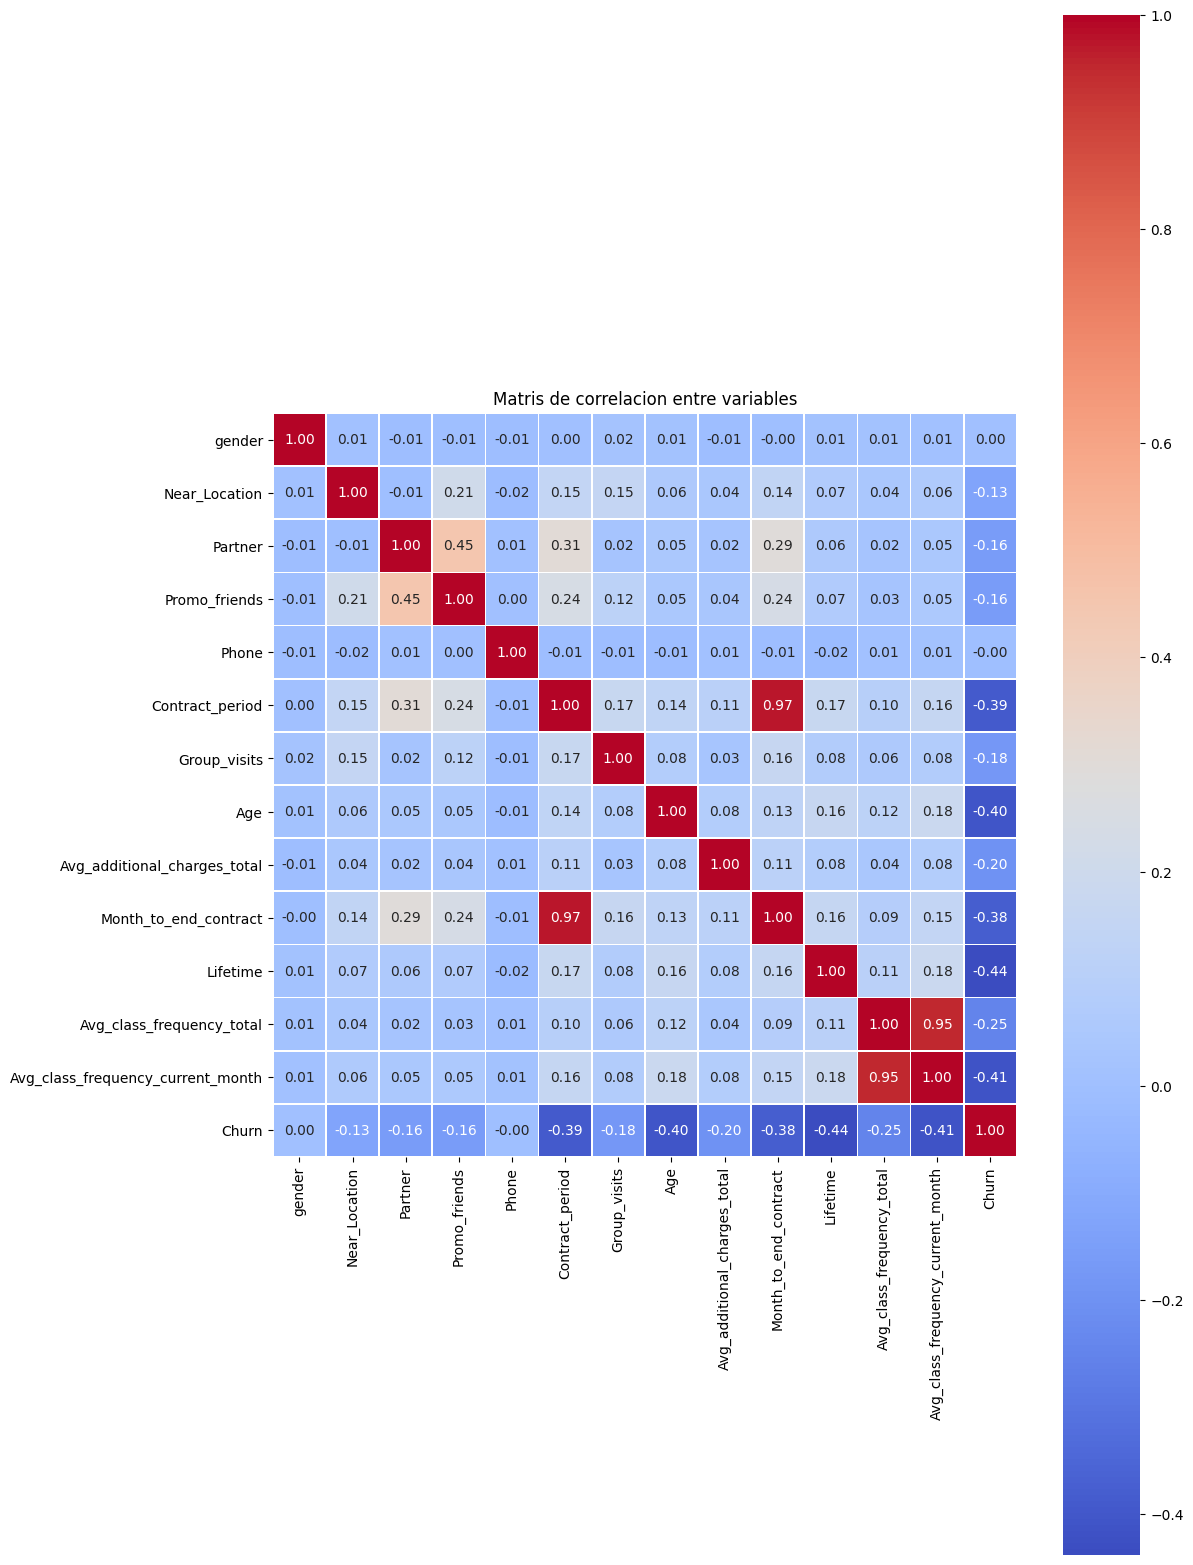

In [5]:
correlation_matrix = cancelaciones.corr()

plt.figure(figsize=(12, 20))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matris de correlacion entre variables")
plt.show()

### Estas variables están fuertemente asociadas con menor cancelacion:

- Lifetime (-0.44)

- Avg_class_frequency_current_month (-0.41)

- Age (-0.40)

- Contract_period (-0.39)

- Month_to_end_contract	(-0.38)

- Avg_additional_charges_total (-0.34)

Podemos interpretar lo siguiente:

A mayor antigüedad, frecuencia reciente, edad, duración del contrato y gasto en servicios adicionales, menor probabilidad de cancelacion.
Esto refuerza que un cliente comprometido y activo tiende a quedarse.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El código está muy bien! Pero siempre que presentes gráficas o termines una exploración debes dejar un comentario con la interpretación de los resultados. Especialmente cuando muestres gráficas o cálculos debes dejar un comentario para que el proceso de análisis sea claro
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así el proceso de análisis es mucho más claro para que se entienda mejor lo realizado en el notebook
</div>

In [6]:
X = cancelaciones.drop('Churn', axis=1)
y = cancelaciones['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de validación:", X_valid.shape)

Tamaño de entrenamiento: (3200, 13)
Tamaño de validación: (800, 13)


In [7]:
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train, y_train)

y_pred_log = modelo_log.predict(X_valid)

print('=== Regresion Logistica ===')
print('Matris de confusion:')
print(confusion_matrix(y_valid, y_pred_log))
print("\nReporte de clasificasion:")
print(classification_report(y_valid, y_pred_log))

=== Regresion Logistica ===
Matris de confusion:
[[563  25]
 [ 36 176]]

Reporte de clasificasion:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800



In [8]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_valid)

print('=== Bosque Aleatorio ===')
print('Matris de confusion:')
print(confusion_matrix(y_valid, y_pred_rf))
print("\nReporte de clasificación:")
print(classification_report(y_valid, y_pred_rf))

=== Bosque Aleatorio ===
Matris de confusion:
[[565  23]
 [ 35 177]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.89      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800



Ambos modelos funcionan bien, pero el bosque aleatorio tiene un rendimiento ligeramente superior.

Tiene mejor precisión (menos falsos positivos) y mejor F1-score, lo cual es importante cuando quieres un equilibrio entre no alarmar a usuarios fieles y detectar abandonos reales.
El recall es igual, así que detectan el mismo porcentaje de verdaderos clientes en riesgo.
Usare Bosque Aleatorio (Random Forest) como modelo final para predecir la cancelacion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    

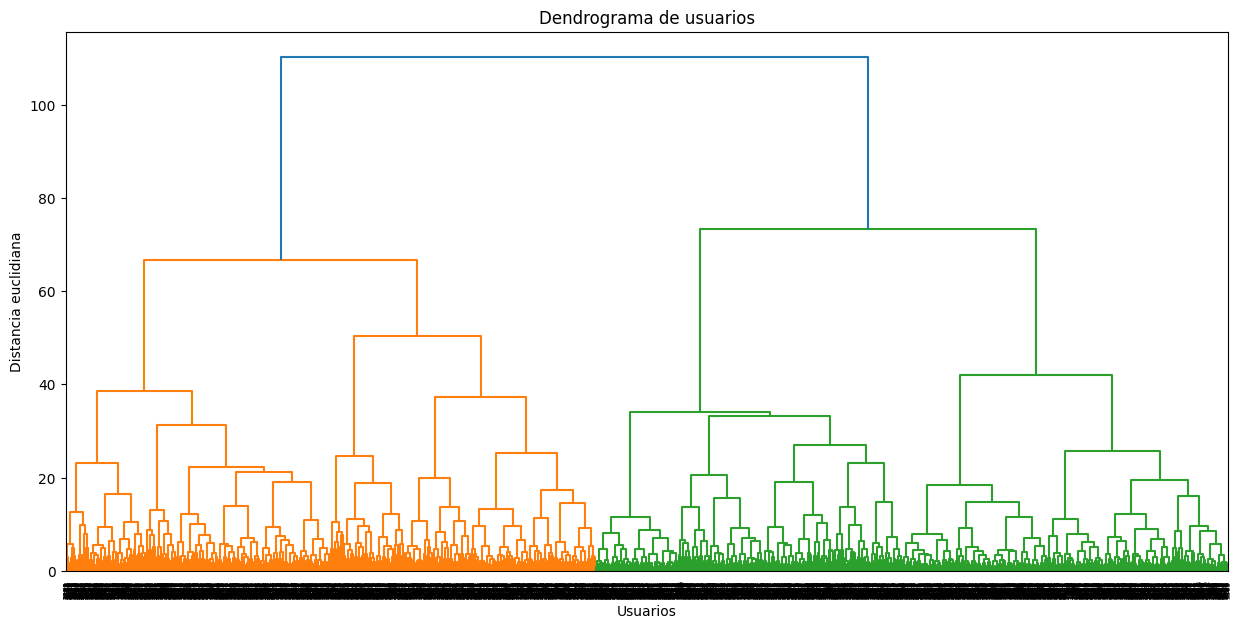

In [10]:
columnas_cluster = [
    'Age',
    'Lifetime',
    'Contract_period',
    'Month_to_end_contract',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total'
]

datos_cluster = cancelaciones[columnas_cluster]

scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos_cluster)

linked = sch.linkage(datos_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrograma = sch.dendrogram(linked)
plt.title('Dendrograma de usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Distancia euclidiana')
plt.show()





In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(datos_scaled)

cancelaciones['cluster'] = clusters

cancelaciones['cluster'].value_counts().sort_index()

0     297
1    1450
2    1046
3     560
4     647
Name: cluster, dtype: int64

In [12]:
cancelaciones.groupby('cluster')[[
    'Age',
    'Lifetime',
    'Contract_period',
    'Month_to_end_contract',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total',
    'Churn'
]].mean().round(2)

,Age,Lifetime,Contract_period,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total,Churn
cluster,,,,,,,,
0,30.09,12.60,3.56,3.21,1.85,1.86,147.35,0.00
1,27.71,1.83,1.42,1.35,1.29,1.00,122.43,0.62
2,30.09,3.46,2.66,2.53,2.80,2.79,158.05,0.10
3,29.87,4.63,12.00,10.83,2.69,2.69,161.33,0.01
4,30.01,3.54,9.45,8.75,1.02,0.99,171.28,0.07


1. Cluster 1 tiene el peor comportamiento... y es el mas grande
Lifetime bajisimo (1.8 meses)

Contrato corto (1.4 meses)

Frecuencia semanal actual: solo 1 vez

¡Churn del 62%!

Este grupo representa el 36% de todos los usuarios (1450 de 4000)

Conclusion:
Este grupo representa una gran fuga de clientes. Es urgente intervenir con estrategias de onboarding, seguimiento y motivación desde el primer mes.

2. Cluster 4 tiene contratos largos, pero casi no usan el servicio
Contratos largos (9.4 meses)

Frecuencia semanal de solo 1 vez

Lifetime corto (3.5 meses)

Conclusion:
Este grupo pagó por anticipado, pero no está comprometido. Son usuarios dormidos que podrian cancelar cuando termine el contrato. Oportunidad para campañas de reactivacion.

3. Clusteres fieles (0 y 3) tienen gasto alto en servicios adicionales
Cluster 0: $147

Cluster 3: $161

Ambos con churn < 1%

Conclusion:
Gastar mas en servicios extra (cafetería, masajes, etc.) esta fuertemente vinculado con la fidelidad. Podrian usarse como indicador o como estrategia: incentivar su uso.

4. Frecuencia de asistencia esta directamente relacionada con la fidelidad
Cluster 0, 2 y 3 → frecuencia > 2 → churn casi nulo

Cluster 1 y 4 → frecuencia ≈ 1 → churn muy alto o en riesgo

Conclusion:
El habito de asistir es el factor más decisivo. Un cliente que no viene, cancela.

5. Edad no parece ser un factor clave
Todos los clusteres rondan los 30 años (de 27.7 a 30.1)

No hay grandes diferencias de edad, ni correlacion evidente con churn

Conclusion:
No se necesita segmentar estrategias por edad. Es mas util hacerlo por comportamiento.

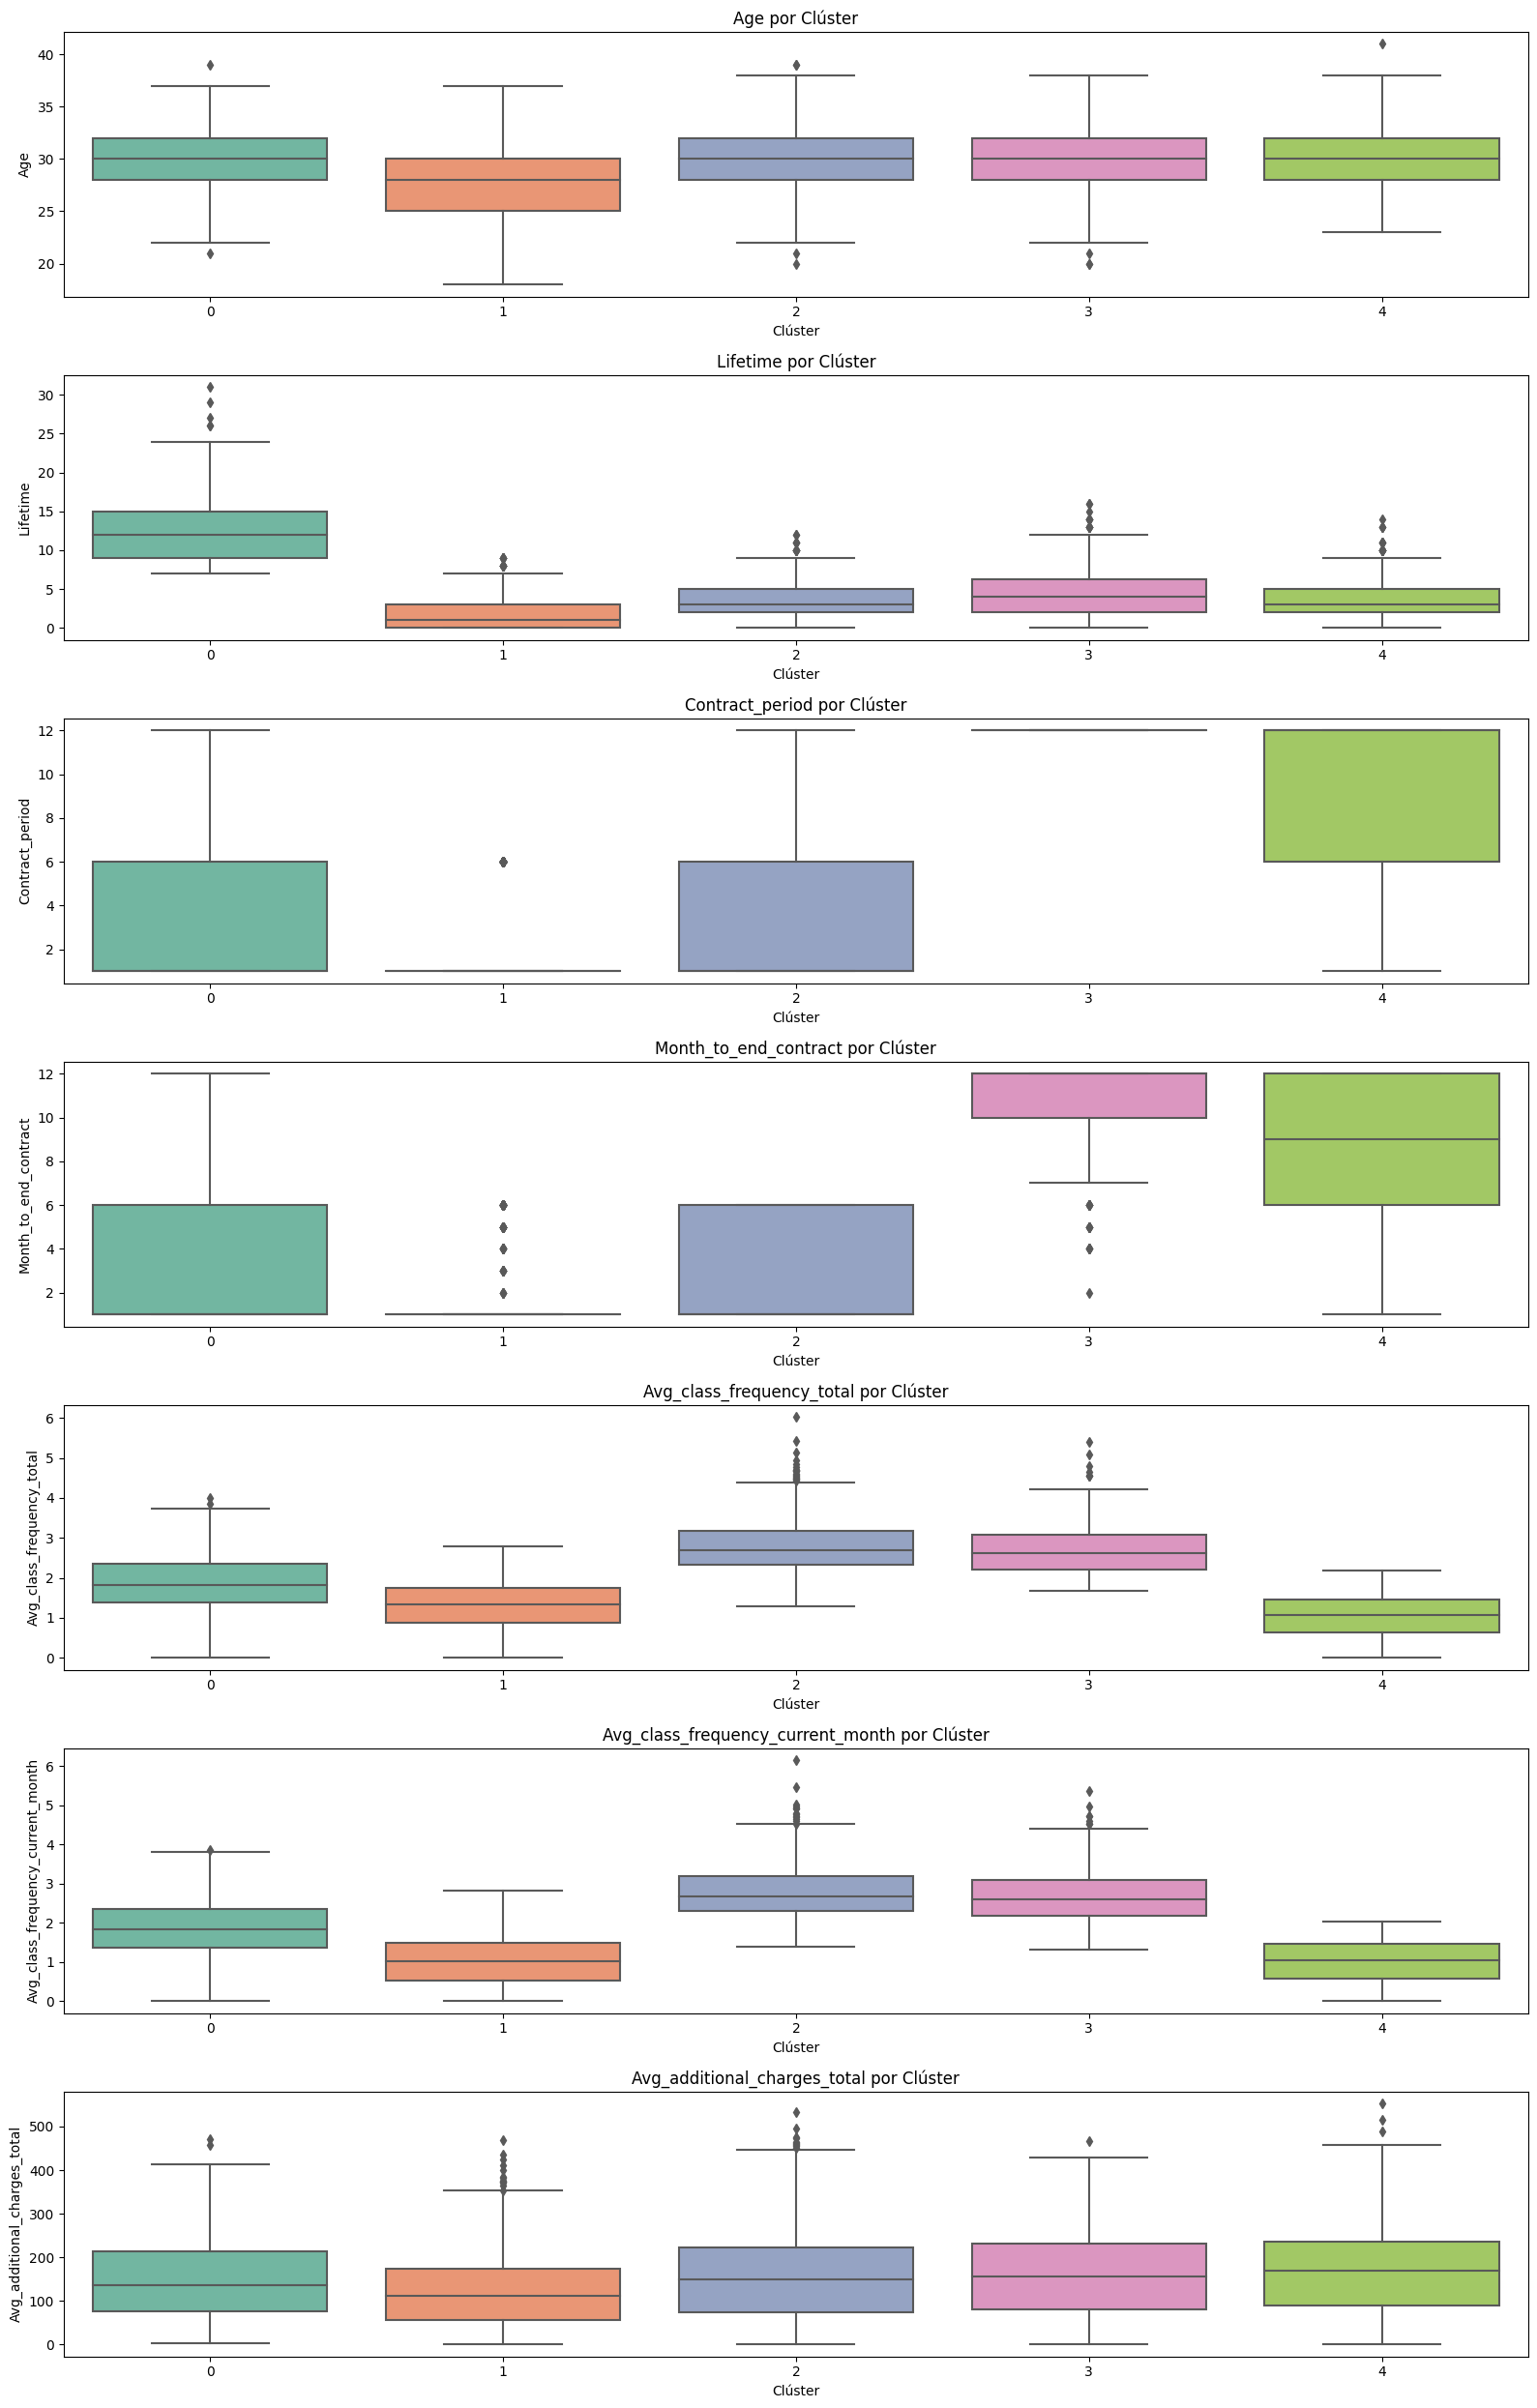

In [13]:
variables = [
    'Age',
    'Lifetime',
    'Contract_period',
    'Month_to_end_contract',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total'
]

plt.figure(figsize=(16, 25))

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)
    sns.boxplot(data=cancelaciones, x='cluster', y=var, palette='Set2')
    plt.title(f'{var} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Observaciones clave por característica

- Edad:
Todos los clusteres tienen una mediana entre 27 y 31 años.
Cluster 1 tiene la poblacion más joven.
Edad no es un factor diferenciador fuerte, como ya sospechabamos.

- Lifetime:
Cluster 0 → usuarios con mas tiempo de permanencia (mediana >10 meses).
Cluster 1 → la mayoria apenas tiene 1-2 meses.
Confirma fidelidad en Cluster 0 y riesgo en Cluster 1.

- Contract_period y Month_to_end_contract:
Cluster 3 y 4 tienen contratos muy largos (6 a 12 meses).
Cluster 1 tiene contratos de 1 mes casi exclusivamente.
Contratos largos no siempre se asocian con uso frecuente (como veremos abajo).

- Avg_class_frequency_total y current_month:
Cluster 2 y 3 → usuarios más activos (asisten >2.5 veces por semana).
Cluster 1 y 4 → frecuencia baja (1 vez o menos).
Cluster 4 tiene contrato largo pero no asisten, lo cual es preocupante.

- Avg_additional_charges_total:
Todos los clusteres tienen valores medianos entre 100 y 200 dolares.
Ligeramente más altos en Clúster 3 y 4.
Apoya la idea de que gasto extra se relaciona con permanencia.

In [14]:
tasa_cancelacion = cancelaciones.groupby('cluster')['Churn'].mean().round(2)

print(tasa_cancelacion.sort_values(ascending=False))


cluster
1    0.62
2    0.10
4    0.07
3    0.01
0    0.00
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

Conclusiones:
La mayoria de las cancelaciones provienen de usuarios nuevos y poco comprometidos (Clúster 1).
Los usuarios mas fieles asisten con regularidad, tienen contratos más largos y gastan en servicios adicionales (Clusteres 0 y 3).
Algunos clientes con contratos largos apenas usan el gimnasio (Clúster 4): son un riesgo silencioso.
Existen usuarios nuevos pero muy activos (Clúster 2): con potencial de fidelización si se les cuida bien.

Recomendaciones clave
1. Enfocar esfuerzos en retención temprana

Problema: Alta rotacion en el primer mes.

Estrategia: Crear una campaña de bienvenida activa:
Seguimiento personalizado la primera semana.
Asesoramiento gratuito inicial.
Incentivos por asistir 3 veces en la primera semana.

2. Activar a los usuarios dormidos

Problema: Usuarios con contrato largo pero baja asistencia.

Estrategia: Campañas de reactivacion:
Notificaciones personalizadas si no vienen en 10 días.
Retos de asistencia mensual con premios simbolicos.
Ofertas cruzadas: “regresa esta semana y obtén un smoothie gratis”.

3. Fidelizar a los usuarios leales

Problema: Retener a los mejores clientes con alto valor.

Estrategia: Crear un club de recompensas:
Descuentos en servicios extra (masajes, cafetería).
Mes gratuito por cada año de contrato.
Reconocimiento simbolico en redes sociales o app interna.

4. Usar datos para identificar riesgos con antelacion

Problema: Falta de accion antes de la cancelación.

Estrategia: Implementar alertas automaticas para:
Frecuencia en caida.
Contratos a punto de vencer sin renovacion.
Clientes con gasto nulo en servicios adicionales.

